In [1]:
import pandas as pd

df = pd.read_csv("datasets/diabetes_clean.csv")

### Before Moving forward, lets answer these questions.

In [2]:
# Context
print("Shape: ",df.shape)
print("Columns: ",df.columns)
print("Datatypes: ",df.dtypes)

Shape:  (768, 9)
Columns:  Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')
Datatypes:  pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object


In [3]:
# Quality Check
print("Null values: ",df.isna().sum())
print("Duplicated Values: ",df.duplicated().sum())

Null values:  pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64
Duplicated Values:  0


In [13]:
# Analysis of Variables
print("Info\n",df.info())
dfx = df.drop(columns=["diabetes"])
print(dfx.describe())
print("Skewness\n",dfx.skew())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Info
 None
       pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   9

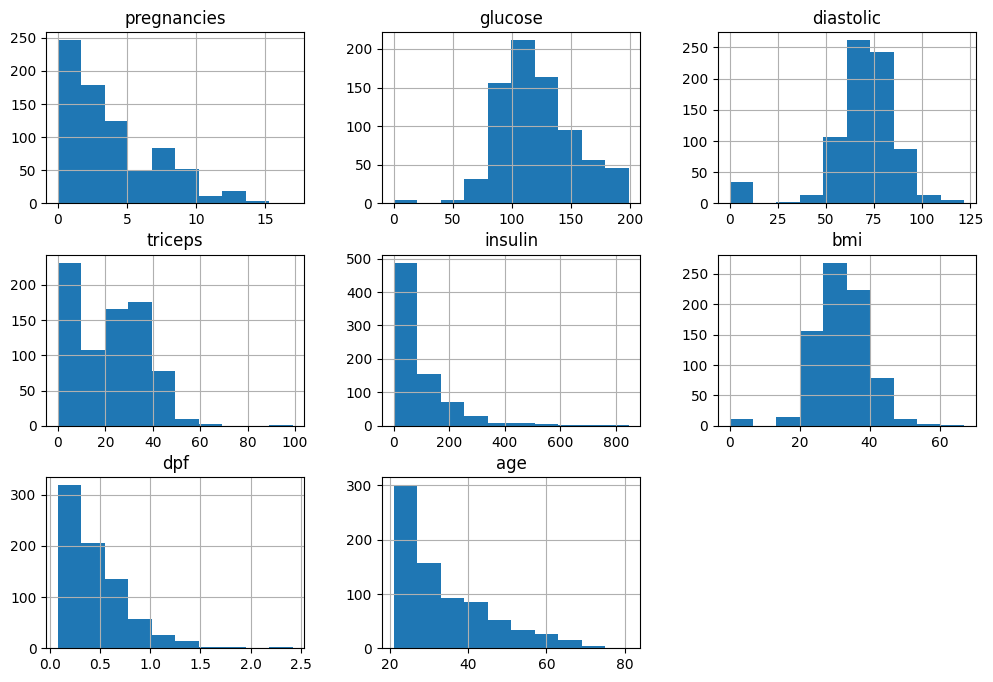

In [5]:
import matplotlib.pyplot as plt

dfx.hist(figsize=(12, 8))
plt.show()


In [ ]:
dfx.skew

pregnancies    0.901674
glucose        0.173754
diastolic     -1.843608
triceps        0.109372
insulin        2.272251
bmi           -0.428982
dpf            1.919911
age            1.129597
dtype: float64


In [14]:
Q1 = df['pregnancies'].quantile(0.25)
Q3 = df['pregnancies'].quantile(0.75)
IQR = Q3-Q1
IQR

np.float64(5.0)

In [22]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [23]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [24]:
df.corr()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

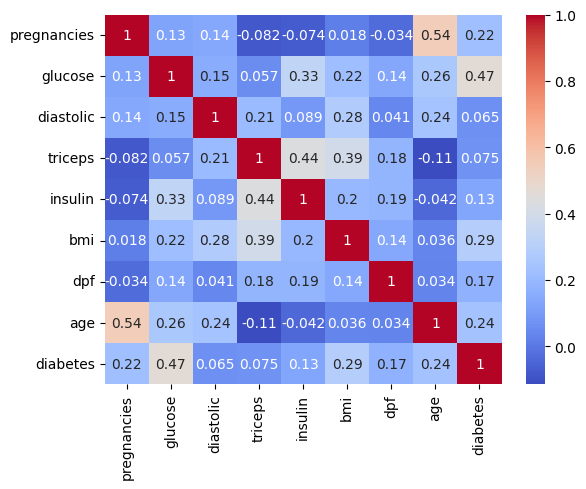

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [29]:
target = "diabetes"
X = df.drop(columns=[target])
y = df[target]
X.shape, y.shape

((768, 8), (768,))

<Axes: xlabel='triceps', ylabel='diabetes'>

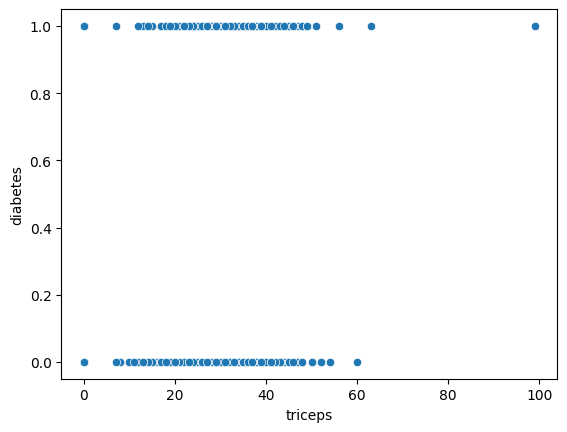

In [40]:
sns.scatterplot(x='triceps',y='diabetes',data=df)

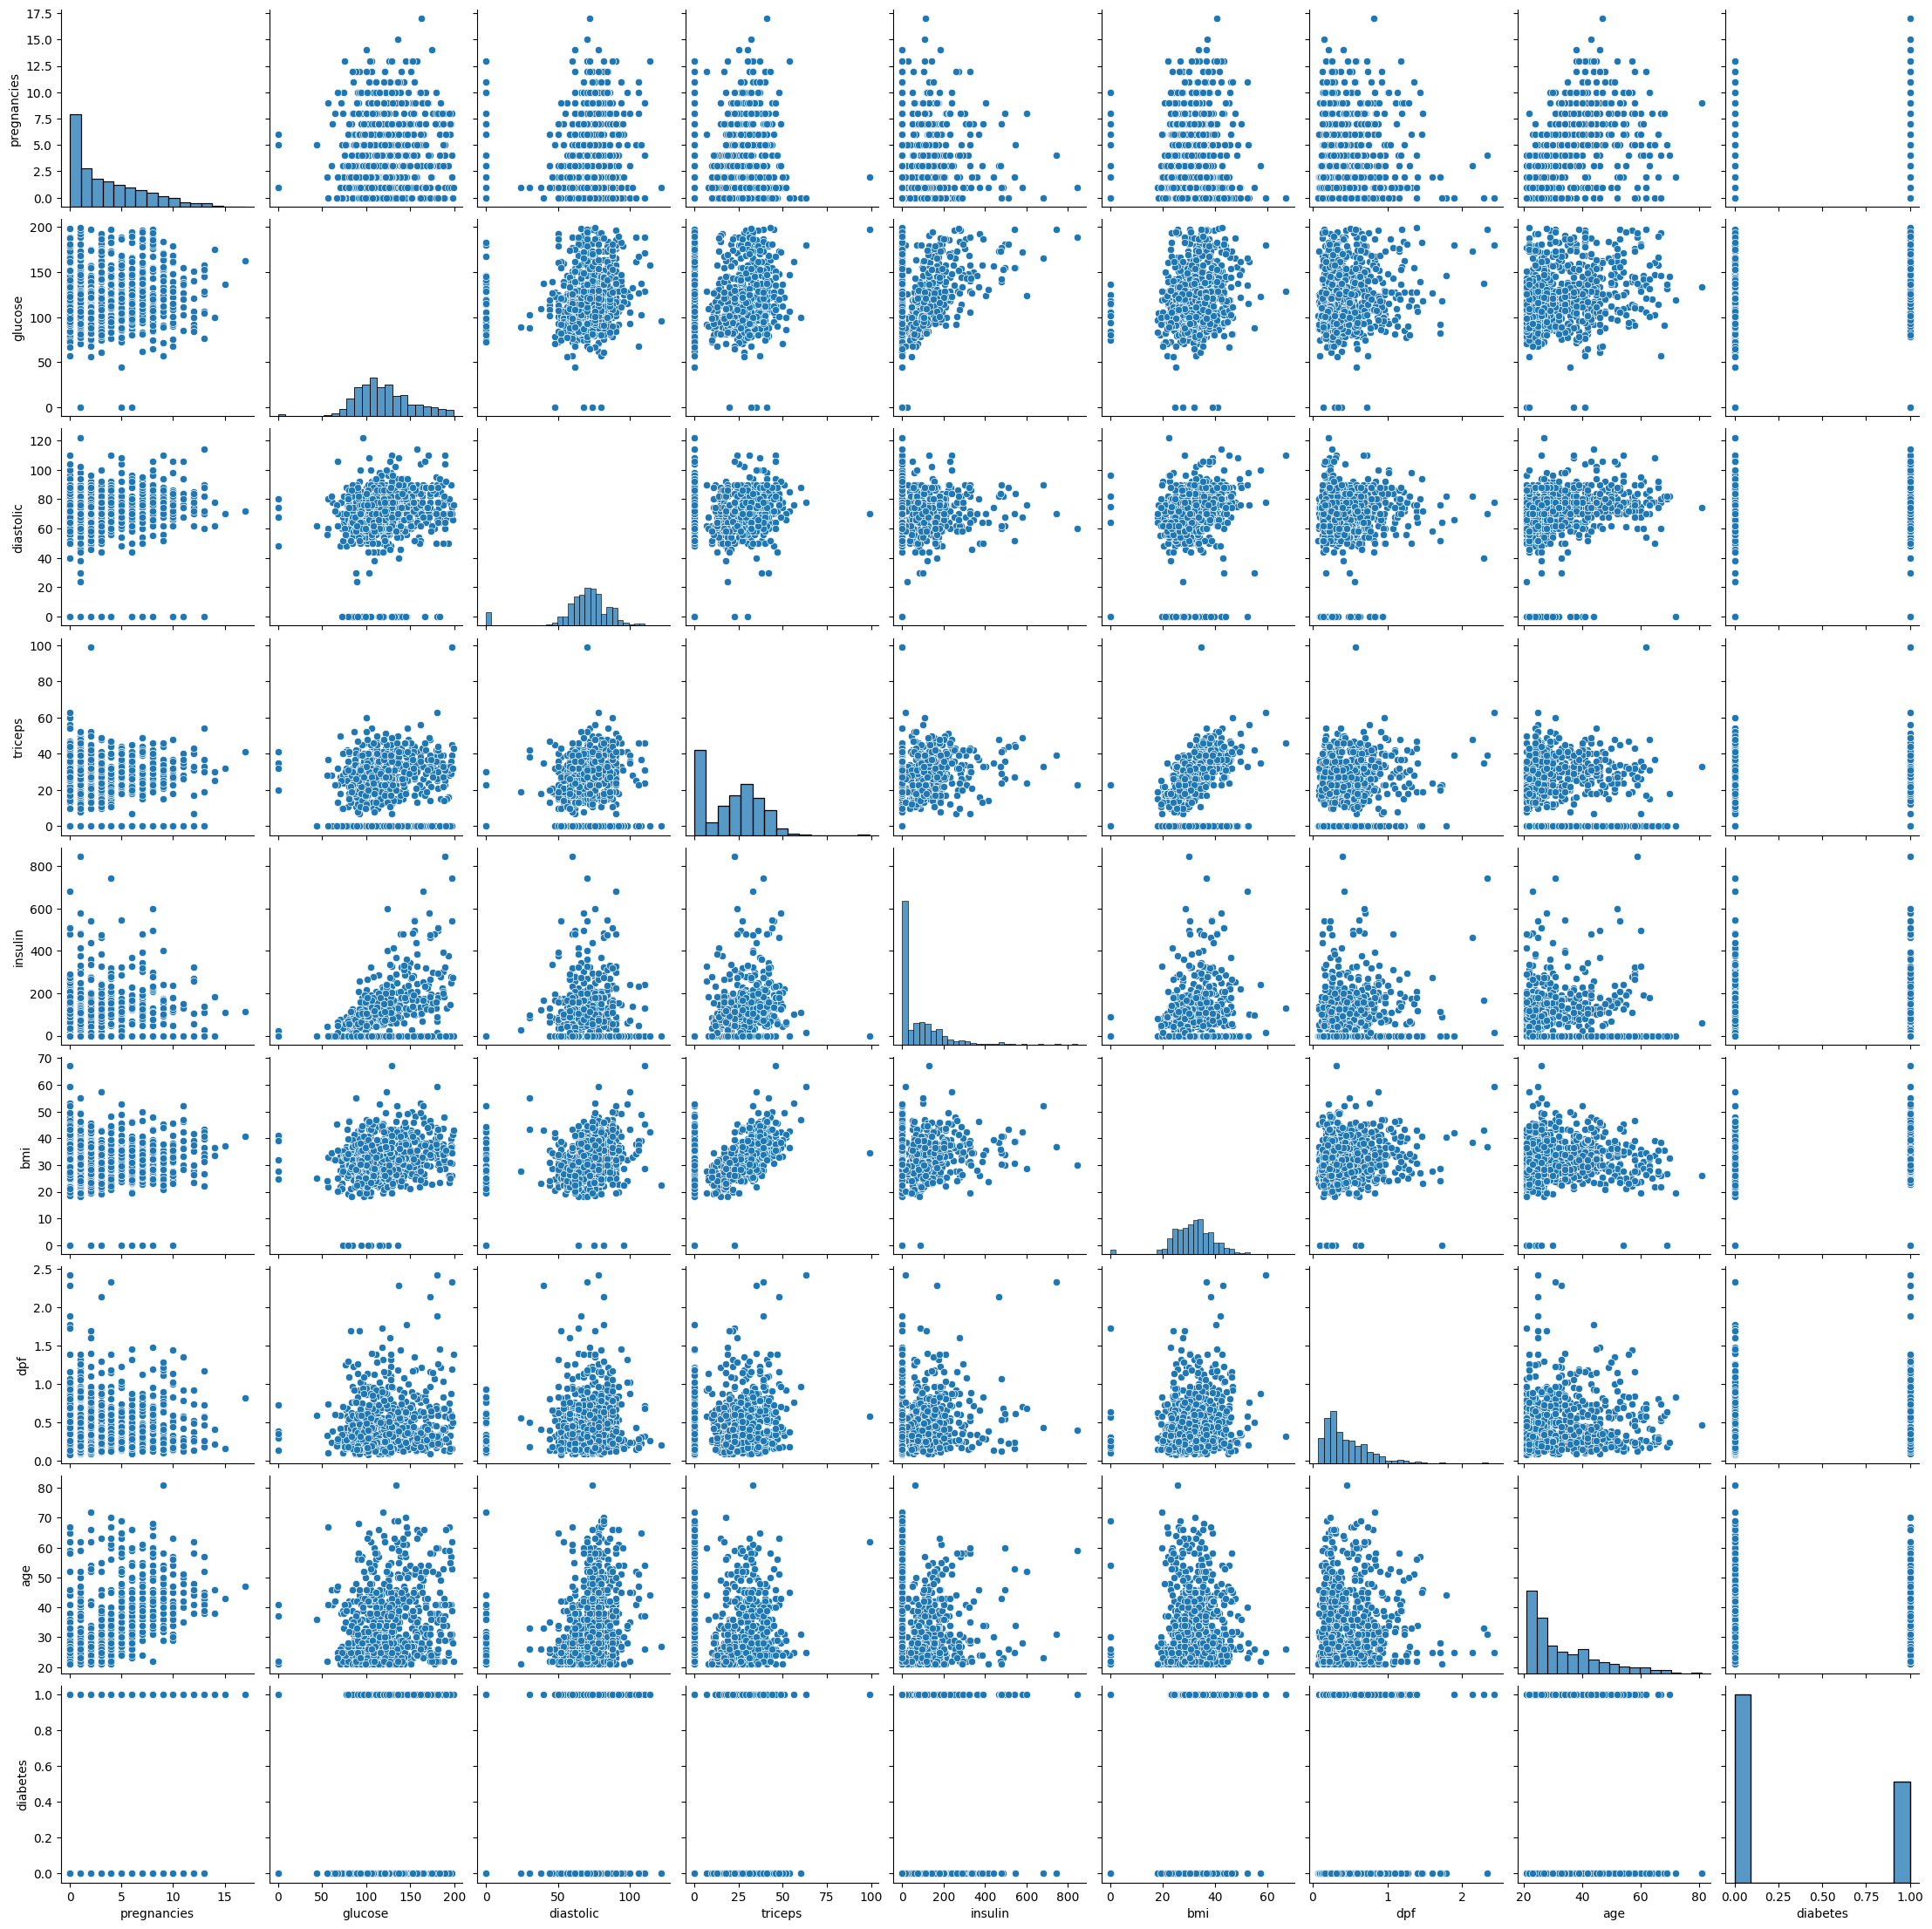

In [42]:
sns.pairplot(df)
plt.savefig("plot.jpg")